In [13]:
import numpy as np
from pylab import plt
from numpy.random import default_rng

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[0 0 0 0 0 0 0 0 0 0 0 1 2 3 4 5 6 7 8 9]


Text(0, 0.5, "The Call Option's Payoff ($C_1$)")

<Figure size 720x432 with 0 Axes>

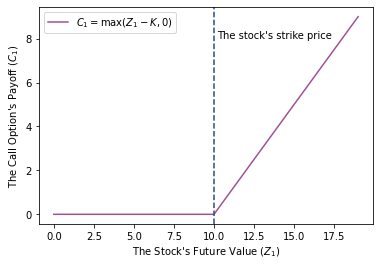

In [14]:
#Formally, a contingent claim is a function that maps economy states to non-negative real numbers, that is to payoffs

#I want to examine the payoff to a stock's call option. First I shall graphically show how that payoff relates to the stock's strike price: 

Z1 = np.arange(20) #First, I create a variety of possible future payoffs. I use Z for its similarity to S, which I want to reserve for future use below
print(Z1)

K = 10 #I define the strike price

C1 = np.maximum(Z1 - K, 0) #The option's payoff values are calculated as the difference between its future value and its current strike price
print(C1)



#I now plot future payoff:
plt.figure(figsize=(10, 6))
plt.subplots()
plt.plot(Z1, C1, color='#a05195', label='$C_1 = \max(Z_1 - K, 0)$') #Note the Latex code!
plt.axvline(x= K, linestyle='--', color='#2f4b7c') 
plt.text(K+0.2, 8, 'The stock\'s strike price')
plt.legend(loc=0)



plt.xlabel('The Stock\'s Future Value ($Z_1)$')
plt.ylabel('The Call Option\'s Payoff ($C_1$)')


In [15]:
#I now assume that two assets are traded:
B = (10, np.array((11, 11))) #A riskless bond with price process B. The bond is not a risky investment because its price process does not depend on the economy's state. 
S = (10, np.array((20, 5))) #and a risky stock with price process S

print(B)
print(S)

#I now want to see whether an agent can replicate the payoff to a call option using a portfolio of a stock and bond

K = 15 #The call option's strike price
C1 = np.maximum(S[1] - K, 0) #I define the call option's price process
print(C1)

#The question now becomes whether a portfolio of stocks and bonds (b, s) can replicate C1:
#I can simply set up a system of equations and solve for the replication problem. If a solution exissts, then that replication portfolio exists.
M = np.array((B[1], S[1])).T #A matrix describing the payoffs of bonds and stocks tomorrow
print(M)

phi=np.linalg.solve(M, C1) #If it exists, phi specifies the replication portfolio
print(phi)

#I can now compute how much the replication portfolio costs to purchase today:

O = np.dot(phi, (B[0], S[0])) #I choose the letter O for 'opportunity cost'
print(O) #Mathematics generally use optimization tools to model economies. Zero-profit conditions follow from those conditions. It follows that the only equilibrium pprice for the contingent claim to the call option is equal to O, lest there are arbitrage opportunities. 


(10, array([11, 11]))
(10, array([20,  5]))
[5 0]
[[11 20]
 [11  5]]
[-0.15151515  0.33333333]
1.8181818181818183


In [16]:
#I now assume that two assets are traded:
B = (10, np.array((11, 11))) #A riskless bond with price process B. The bond is not a risky investment because its price process does not depend on the economy's state. 
S = (10, np.array((20, 5))) #and a risky stock with price process S

print(B)
print(S)

#I now want to see whether an agent can replicate the payoff to a call option using a portfolio of a stock and bond

K = 15 #The call option's strike price
C1 = np.maximum(S[1] - K, 0) #I define the call option's price process
print(C1)

#The question now becomes whether a portfolio of stocks and bonds (b, s) can replicate C1:
#I can simply set up a system of equations and solve for the replication problem. If a solution exissts, then that replication portfolio exists.
M = np.array((B[1], S[1])).T #A matrix describing the payoffs of bonds and stocks tomorrow
print(M)

phi=np.linalg.solve(M, C1) #If it exists, phi specifies the replication portfolio
print(phi)

#I can now compute how much the replication portfolio costs to purchase today:

O = np.dot(phi, (B[0], S[0])) #I choose the letter O for 'opportunity cost'
print(O) #Mathematics generally use optimization tools to model economies. Zero-profit conditions follow from those conditions. It follows that the only equilibrium pprice for the contingent claim to the call option is equal to O, lest there are arbitrage opportunities. 


(10, array([11, 11]))
(10, array([20,  5]))
[5 0]
[[11 20]
 [11  5]]
[-0.15151515  0.33333333]
1.8181818181818183


C:\Users\harri\AppData\Local\Temp/ipykernel_14476/2747464827.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  plt.plot(A[:, 0], A[:,1], 'r.', color='#a05195')


Text(20, 5, 'Pure Stock Portfolio')

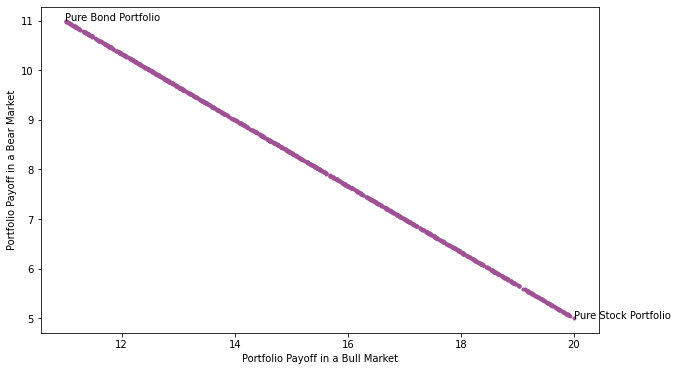

In [17]:
#Market Completeness
#A market is complete when I can assign a price to every feasible asset within an economy.
#I shall prove completeness for a simple two-asset economy graphically by demonstrating the existence of a line between two pure portfolios. That line demonstrates that I can choose any feasible mixed portfolio.

rng=default_rng(100)

n =1000
b = rng.random(n)


s = (1-b) #The stock position is the unit completement to the bond position


def portfolio(b, s):
    A = [b[i]*B[1] + s[i]*S[1] for i in range(n)]
    return np.array(A)


A = portfolio(b, s)



plt.figure(figsize=(10, 6))
plt.plot(A[:, 0], A[:,1], 'r.', color='#a05195')
plt.xlabel('Portfolio Payoff in a Bull Market')
plt.ylabel('Portfolio Payoff in a Bear Market')
plt.annotate("Pure Bond Portfolio", (11, 11))
plt.annotate("Pure Stock Portfolio", (20, 5))

#Market completeness is demonstrated by the line of possible stocks between a pure bond and pure stock portfolio. There is a portfolio that corresponds to any arbitrary feasible combination of stocks and bonds. 